<a href="https://colab.research.google.com/github/BrunoASNascimento/ml_study/blob/master/Stock_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (BTG PACTUAL S.A) using the past 60 day stock price.

In [ ]:
#Import the libraries 
!pip install pyopencl==2019.1.1

     |████████████████████████████████| 727kB 2.9MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Created wheel for pytools: filename=pytools-2020.3.1-py2.py3-none-any.whl size=65243 sha256=aa061dc00e26fba6d1f3538efa6f4d044902d5a59ed64348bba19e6aed1f83db
  Stored in directory: /root/.cache/pip/wheels/ac/01/07/fe484d8aae398b7f6150dae468a53887f0e7e265f1fc7fc975
Successfully built pytools


In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
stock_code = 'BOVA11.SA'
df = web.DataReader(stock_code, data_source='yahoo', start='2000-01-01', end='2020-08-02') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-02,35.810001,34.910000,35.110001,35.389999,759900.0,35.389999
2008-12-03,35.400002,33.900002,34.730000,35.310001,330100.0,35.310001
2008-12-04,36.000000,35.150002,35.799999,35.700001,128400.0,35.700001
2008-12-05,35.349998,34.110001,34.509998,35.349998,193700.0,35.349998
2008-12-08,38.459999,36.950001,37.349998,38.459999,103100.0,38.459999
...,...,...,...,...,...,...
2020-07-27,100.730003,98.849998,98.930000,100.620003,7329950.0,100.620003
2020-07-28,100.800003,99.610001,100.250000,100.309998,5688120.0,100.309998
2020-07-29,101.769997,100.860001,100.930000,101.500000,6179820.0,101.500000


In [ ]:
df.shape

(2887, 6)

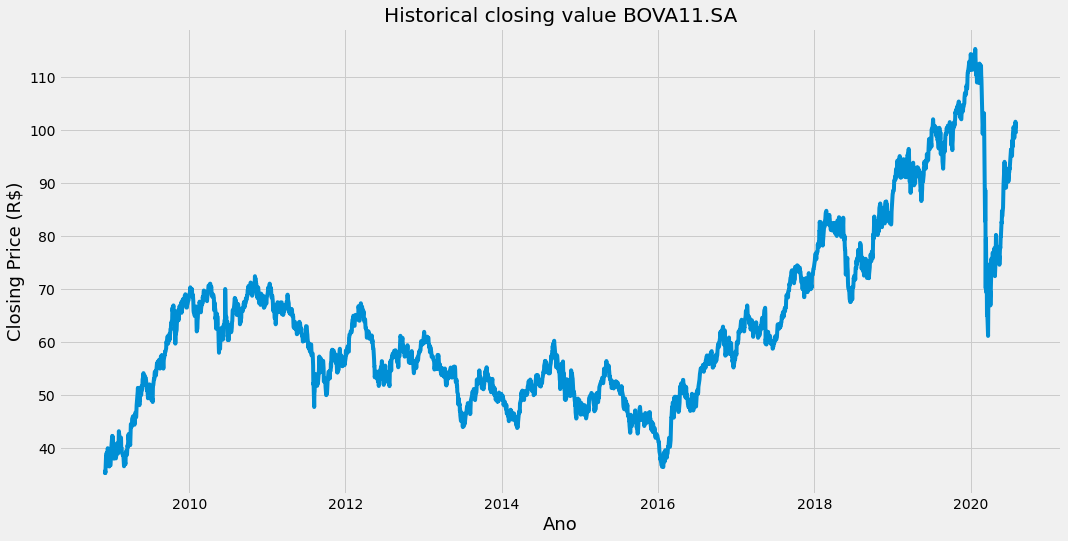

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title(f'Historical closing value {stock_code}')
plt.plot(df['Close'])
plt.xlabel('Ano',fontsize=18)
plt.ylabel('Closing Price (R$)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=400, return_sequences=False))
model.add(Dense(units=200))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2250/2250 [==============================] - 655s 291ms/step - loss: 6.9922e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.424666181782306

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


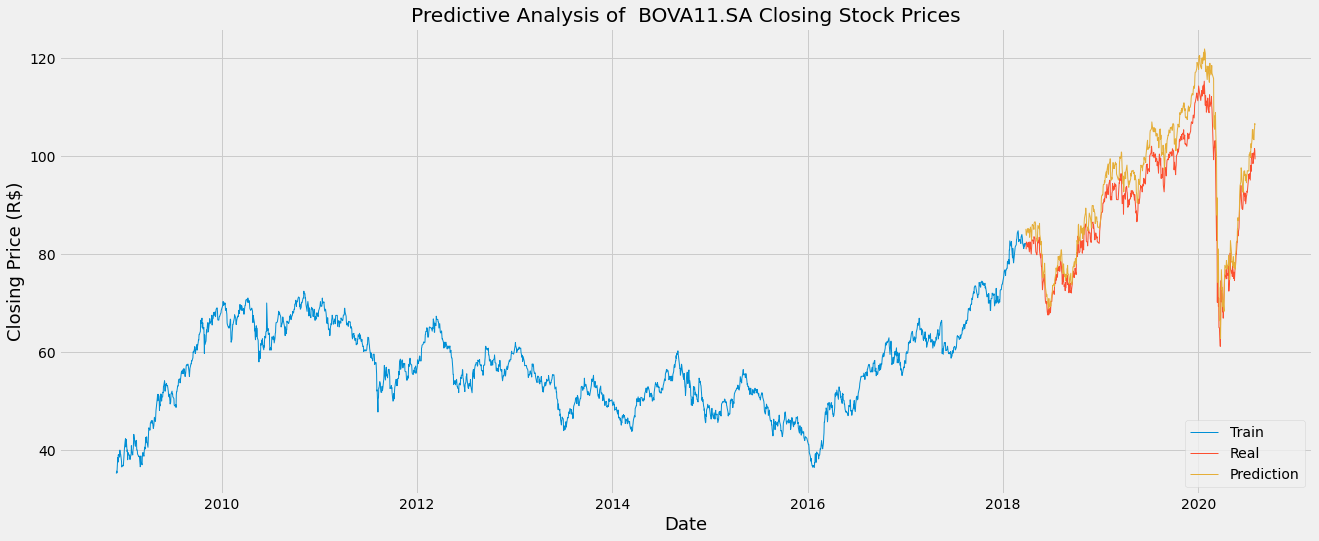

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(20,8))
plt.title(f'Predictive Analysis of  {stock_code} Closing Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (R$)', fontsize=18)
plt.plot(train['Close'],linewidth=1.0 )
plt.plot(valid[['Close', 'Predictions']],linewidth=1.0 )
plt.legend(['Train', 'Real', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-03-27,80.980003,85.103386
2018-03-28,81.019997,84.013977
2018-03-29,82.430000,83.801430
2018-04-02,81.849998,85.164383
2018-04-03,81.750000,84.903412
...,...,...
2020-07-27,100.620003,103.275253
2020-07-28,100.309998,105.302002
2020-07-29,101.500000,105.482880


In [ ]:
#Get the quote
bpac_quote =  web.DataReader('BPAC11.SA', data_source='yahoo', start='2012-01-01', end='2020-07-27') 
#Create a new dataframe
new_df = bpac_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[90.916794]]


In [ ]:
#Get the quote
bpac_quote2 = web.DataReader('BPAC11.SA', data_source='yahoo', start='2020-07-28', end='2020-07-28')
print(bpac_quote2['Close'])

Date
2020-07-28    84.75
Name: Close, dtype: float64
